# 2019 Kaggle ML & DS Survey

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from locale import atof
%matplotlib inline

#set ggplot style
#plt.style.use('ggplot')

# Load dataset

multiple_choice_responses = pd.read_csv('D:/data science/Kaggle/Data/kaggle-survey-2019/multiple_choice_responses.csv')

C:\Users\310\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Contents
### 1. Introduction
### 2. What is Data Science?
        2.1. Definition
        2.2. Basic and goal of data science
        2.3. Growth of data science
### 3. Who is a Data Scientist?
        3.1. Data scientist role at work 
        3.2. The highest level of formal education for data scientist
        3.3. Data scientist yearly compensation
        3.4. How to become a data scientist?
### 4. What is Machine Learning?
        4.1. Machine Learning Algorithms
### 6. Data science and Machine Learning tools
        6.1. IDE's, programming language and data visualization libraries for data science and machine learning
        6.2. Hardware for data science and machine learning
        6.3. Machine Learning framework 
        6.4. Machine Learning tools
        6.5. Automated Machine Learning tools
        6.6. Machine Learning products
### 7.  Cloud Computing platforms
### 8. Conclusion

### 1. Introduction

Modern technology has enabled the creation and storage of increasing amounts of information, which has increased the volume of data. For example, Facebook users import 10 million photos every hour. The number of connected devices in the world, called the Internet of Things (IoT), is expected to reach more than 75 billion by 2025 (https://www.statista.com/statistics/471264/iot-number-of-connected-devices-worldwide/).
The wealth of data collected and stored by these technologies can bring benefits that will transform organizations and societies around the world, but only if we can interpret them. That's where Data Science comes in. Our job is to make a story about data science and machine learning. This goal will be achieved by following the steps above and especially by relying on Data Science survey 2019. 

Indeed, this survey comes from information collected from some Kaggle users. These respondents are 19,717. The graphic representation below shows the title of the various respondents and the number of respondents corresponding to each title.

In [300]:
len(multiple_choice_responses) - 1

19717

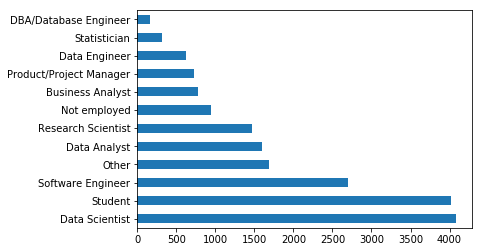

In [30]:
multiple_choice_responses = multiple_choice_responses.drop(0, axis=0)
multiple_choice_responses = multiple_choice_responses.reset_index(drop=True)
multiple_choice_responses["Q5"].value_counts().plot.barh()

However our story will be more focused on the respondents (without forgetting the others) who perform at least one machine learning task (among those listed in survey) because we are talking about data science and machine learning, so it will be essential for us to rely on them. Here we have 9,226 respondents.

In [31]:
# Get a dataframe with responding who make at least one ML activities
df = multiple_choice_responses.copy()
only_ml_activities = multiple_choice_responses.copy()
for rows in range(len(multiple_choice_responses)):
    if(pd.isna(df.iloc[rows]['Q9_Part_1']) & pd.isna(df.iloc[rows]['Q9_Part_2']) 
       & pd.isna(df.iloc[rows]['Q9_Part_3']) & pd.isna(df.iloc[rows]['Q9_Part_4']) 
       & pd.isna(df.iloc[rows]['Q9_Part_5']) & pd.isna(df.iloc[rows]['Q9_Part_6'])
       & pd.isna(df.iloc[rows]['Q9_Part_7']) & pd.isna(df.iloc[rows]['Q9_Part_8'])):
        only_ml_activities.drop(rows, axis=0, inplace=True)
only_ml_activities = only_ml_activities.reset_index(drop=True)
len(only_ml_activities)

9226

### 2. What is Data Science?

  #### 2.1. Definition

Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to exploit data.

#### 2.2. Basic and goal of data science

It comes from the fields of statistical analysis and data extraction. 

Data science reveals trends and provides information that companies can use to make better decisions and create more innovative products and services. Data is the foundation of innovation, but its value comes from the information that data scientists can draw and then exploit.

#### 2.3. Growth of data science

This area has become very popular thanks to the wealth of data we create. To give you an idea, it is created around 2 billion bytes of data in the world every minute (https://theconversation.com/management-et-data-science-une-discipline-emergente-en-sciences-de-gestion-85264 ).
The Data Science Journal appeared in 2002, published by the International Council for Science: Committee on Data for Science and Technology. In 2008, the title of data scientist had emerged and the field had grown rapidly (https://www.dataversity.net/brief-history-data-science/ ). The emergence of this area is reflected by the increase in the demand for data scientist on the job market.

### 3. Who is a Data Scientist?

A data scientist is a specialist whose mission is to develop data analysis strategies, prepare data for analysis, explore, analyze and visualize data, create models with data to the data using programming languages such as Python and R, and deploying these models in applications.
The process of data analysis and exploitation is iterative rather than linear, but here is the standard workflow of a data modeling project:
- Plan: Define a project and its potential results
- Prepare: build the work environment by ensuring that data scientists have the right tools, as well as access to appropriate data and other resources such as computing power
- Ingest: load data into the work environmentExplore: analyze, explore and visualize data
- Model: Design, Train, and Validate Models to Work as Expected
- Deploy: deploy models in production

Data scientist is not a specific gender. It can be male, female an order.

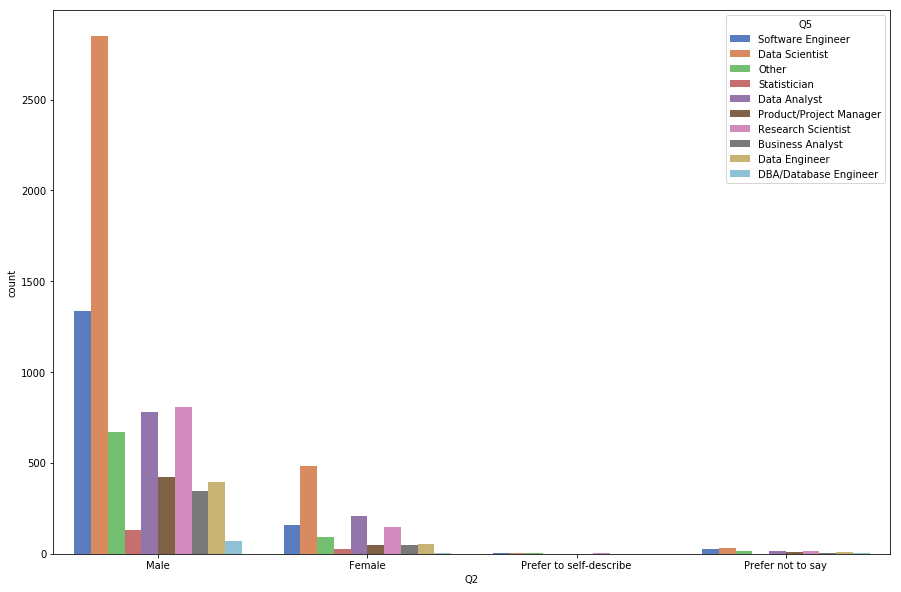

In [128]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x="Q2", hue="Q5", data=only_ml_activities, palette="muted", order=only_ml_activities["Q2"].unique())

#### 3.1. Data scientist role at work

According to data survey, the mainly role (in ascending order of the most practiced) of data scientist are:
- Analyze and understand data to influence product or business decisions 
- Build prototypes to explore applying machine learning to new areas
- Experimentation and iteration to improve existing ML models
- Build and/or run a machine learning service that operationally improves my product or workflows
- Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data
- Do research that advances the state of the art of machine learning

In [34]:
def question_column(column, df):
    count = 0
    for col in range(len(df.columns)):
        if column in df.columns[col]:
            new=df[[df.columns[col]]]
            if count==0:
                new_df = pd.DataFrame(new)
                count=+1
            else:
                new_df = new_df.join(new)
    return new_df

In [36]:
def change_column_name(df):
    name = []
    dfs = df.copy()
    for column in df.columns:
        for row in range(len(df)):
            if pd.isna(df.iloc[row][column]):
                continue
            else:
                dfs=df.rename(columns = {column : df.iloc[row][column]}, inplace=True)
                break
    return df 

In [37]:
def change_value(df):
    for column in df.columns:
        for row in range(len(df)):
            if pd.isna(df.iloc[row][column]):
                df.iloc[row][column] = 0
            else:
                df.iloc[row][column] = 1
    return df 

In [38]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q9", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q9 = change_value(change_name)
# Drop the last column
Q9_drop = Q9.drop(Q9.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q9 = pd.concat([only_ml_activities["Q5"], Q9_drop], axis=1)

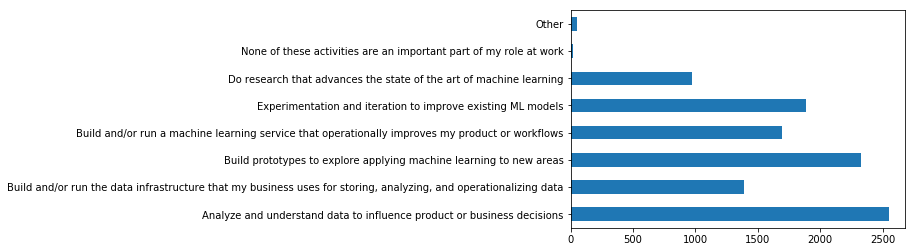

In [39]:
# Group by role
groupe_role = Q5_Q9.groupby("Q5").sum().transpose()
# Plotting for data scientist role
groupe_role["Data Scientist"].plot.barh()

However, not only are data scientists practicing at least one of the activities (as shown below). We also find that no student performs any of these activities, perhaps because they are still students. On the other hand, others (Software Engineer, Data Analyst, Research Scientist, ...) do it. Do they also have to be considered data scientists ?

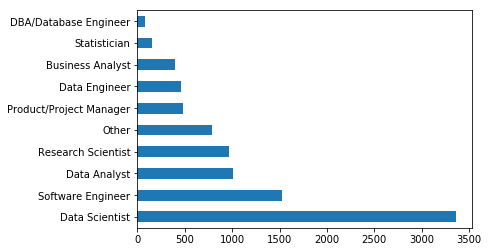

In [40]:
# Plotting all role whose make least a machine learning activities
only_ml_activities["Q5"].value_counts().plot.barh()

For Computer Engineers the order of the activities is the following one (from the most practiced to the least practiced):
- Build prototypes to explore applying machine learning to new areas
- Analyze and understand data to influence product or business decisions 
- Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data
- Build and/or run a machine learning service that operationally improves my product or workflows
- Experimentation and iteration to improve existing ML models
- Do research that advances the state of the art of machine learning

For Research Scientist the order of the activities is the following one (from the most practiced to the least practiced):
activities is the following one (from the most practiced to the least practiced):
- Build prototypes to explore applying machine learning to new areas
- Do research that advances the state of the art of machine learning
- Experimentation and iteration to improve existing ML models
- Analyze and understand data to influence product or business decisions 
- Build and/or run a machine learning service that operationally improves my product or workflows
- Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data

We can thus deduce that the activities performed by each depend on their role.

Text(0, 0.5, 'TOTAL')

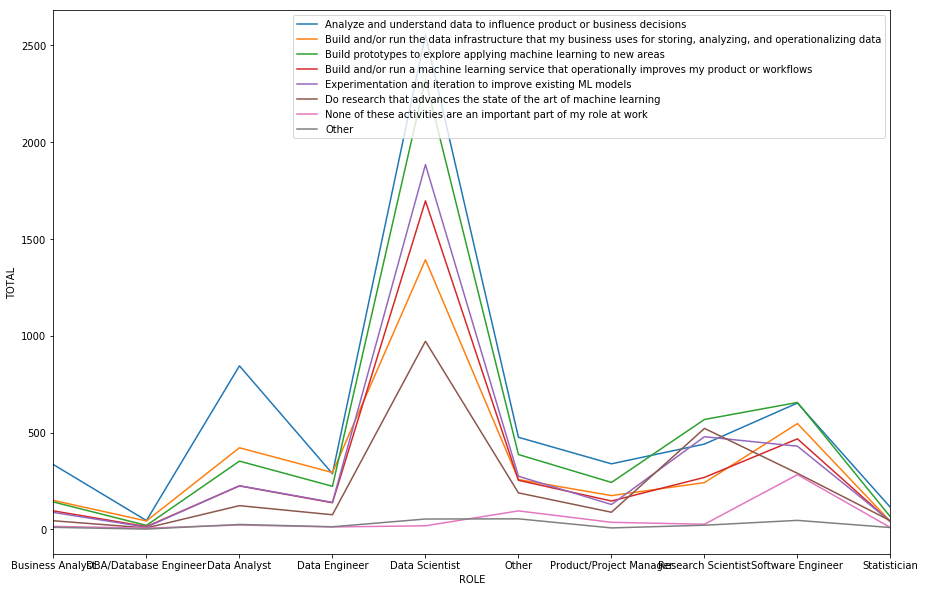

In [45]:
# Plotting activities and total of role for each activity
fig, ax = plt.subplots(figsize=(15,10))
Q5_Q9.groupby("Q5").sum().plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

The data scientist doesn't work alone. In reality, data science is more efficient when a team is working on it. In addition to a data expert, this team can include a business analyst who defines the problem, a data engineer who prepares the data and their availability, an IT architect who oversees the underlying processes and infrastructure, and a software developer that deploys the models or results of the analysis into applications and products.

The graph below shows that the majority of data scientists work in a team, about 98.28%.

In [79]:
# Concatenate role and responsible for data science workloads columns
concat_Q5_Q7 = pd.concat([only_ml_activities["Q5"], only_ml_activities["Q7"]], axis=1)
group_Q5_Q7 = concat_Q5_Q7.groupby(["Q5", "Q7"]).size()
# Get DataFrame for data scientist only 
data_scientist = concat_Q5_Q7[concat_Q5_Q7["Q5"]=="Data Scientist"]
# Get DataFrame for all who work in a team
in_team = concat_Q5_Q7[concat_Q5_Q7["Q7"]!="0"]
# Get for data scientist only who work in a team
data_scientist_in_team = in_team[in_team["Q5"]=="Data Scientist"]
# Compute the percent of data scientist who work in a team
percent_data_scientist =(len(data_scientist_in_team) / len(data_scientist)) * 100
print(percent_data_scientist)

98.27586206896551


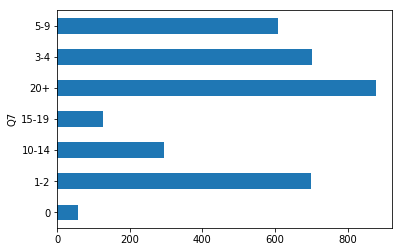

In [46]:
group_Q5_Q7["Data Scientist"].plot.barh()

This is also the case for the other roles (see the figure below).

Text(0, 0.5, 'TOTAL')

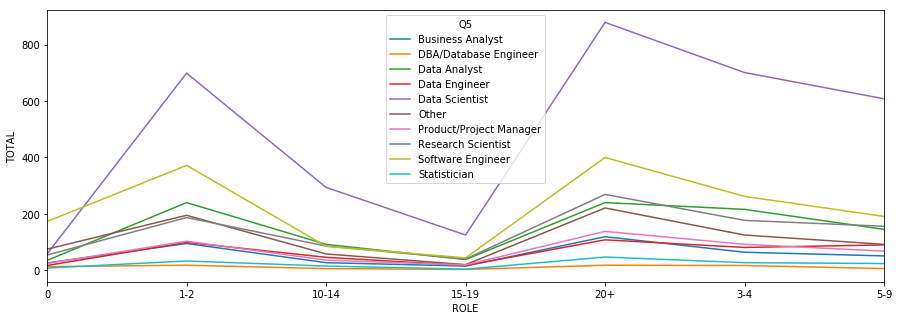

In [49]:
# Plotting for all role
fig, ax = plt.subplots(figsize=(15,5))
concat_Q5_Q7.groupby(["Q7","Q5"])["Q7"].count().unstack().plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

#### 3.2. The highest level of formal education for data scientist

We find that the highest level of formal education that data scientist have attained or plan to attain within the next 2 year is mostly Master's Degree, followed by Bachelor's Degree and Doctoral Degree. However, we also have data scientist who don't got formal education past high school. So, is it possible to become a data scientist without get formal education past high school? How did they do to get data scientist role? 

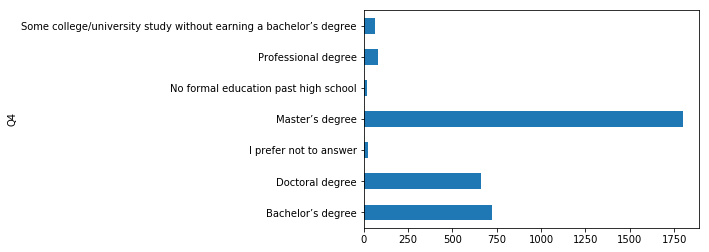

In [80]:
group_level = pd.concat([only_ml_activities["Q5"], only_ml_activities["Q4"]], axis=1)
group = group_level.groupby(["Q5", "Q4"]).size()

group["Data Scientist"].plot.barh()

#### 3.3. Data scientist yearly compensation

According to data science survey 2019, median data scientist yearly compensation 
- with experience < 1 year is : $19,520.75-24,582.02

In [164]:
def compensation_remove_carac(df):
    for x in range(len(df)):
        compensation = df.get_value(x,'Q10')
        if(type(compensation)!=float):
            value = compensation.replace("$", "")
            df.at[x, "Q10"] = value.replace("> ", "")
        else:
            continue
    return df

In [163]:
def get_min_max_compensation(df):
    df2 = pd.DataFrame(columns=["Min_compensation","Max_compensation"])
    group_compensation = pd.concat([df, df2], axis=1)
    for x in range(len(df)):
        compensation2 = df.get_value(x,'Q10')
        if(pd.isna(compensation2)):
            group_compensation.at[x, "Min_compensation"] = float(0)
            group_compensation.at[x, "Max_compensation"] = float(0)
        else:
            if(compensation2=="500,000"):
                group_compensation.at[x, "Min_compensation"] = float(500000)
                group_compensation.at[x, "Max_compensation"] = float(500000)
            else:
                group_compensation.at[x, "Min_compensation"] = float(compensation2.split('-', 1)[0].replace(',', ''))
                group_compensation.at[x, "Max_compensation"] = float(compensation2.split('-', 1)[1].replace(',', ''))
    group_compensation=group_compensation.drop(group_compensation.columns[0], axis=1)
    return group_compensation.astype(float)

In [237]:
# Get compensation column
compensation = pd.DataFrame(only_ml_activities["Q10"])
df = compensation_remove_carac(compensation)
compensation_min_max = get_min_max_compensation(df)
# Concatenate role, yearly compensation, professional experiences columns 
role_compensation_experience = pd.concat([only_ml_activities["Q5"], only_ml_activities["Q23"], compensation_min_max], axis = 1)
# Plotting data scientist yearly compensation with experience < 1 year
group_role_compensation_experience = role_compensation_experience[role_compensation_experience["Q23"]=="< 1 years"]
group_role_compensation_experience = group_role_compensation_experience[group_role_compensation_experience["Q5"]=="Data Scientist"]

mean_min = group_role_compensation_experience["Min_compensation"].mean()  
mean_max = group_role_compensation_experience["Max_compensation"].mean()

print("$" + str("{:.2f}".format(mean_min)) + "-" + str("{:.2f}".format(mean_max)))

C:\Users\310\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\310\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


$19520.75-24582.02


- with experience between 5-10 years is : $97,383.41-120,008.64

In [240]:
group_role_compensation_experience = role_compensation_experience[role_compensation_experience["Q23"]=="5-10 years"]
group_role_compensation_experience = group_role_compensation_experience[group_role_compensation_experience["Q5"]=="Data Scientist"]

mean_min = group_role_compensation_experience["Min_compensation"].mean()  
mean_max = group_role_compensation_experience["Max_compensation"].mean()  

print("$" + str("{:.2f}".format(mean_min)) + "-" + str("{:.2f}".format(mean_max)))

$97383.41-120008.64


- with experience between 10-15 years is : $110,128.91-140,127.98

In [241]:
group_role_compensation_experience = role_compensation_experience[role_compensation_experience["Q23"]=="10-15 years"]#.groupby(["Q5", "Min_compensation"]).size()
group_role_compensation_experience = group_role_compensation_experience[group_role_compensation_experience["Q5"]=="Data Scientist"]

mean_min = group_role_compensation_experience["Min_compensation"].mean()  
mean_max = group_role_compensation_experience["Max_compensation"].mean()  

print("$" + str("{:.2f}".format(mean_min)) + "-" + str("{:.2f}".format(mean_max)))

$110128.91-140127.98


- with experience between 20+ years years is : $ 134,379.03-170,789.40

In [242]:
group_role_compensation_experience = role_compensation_experience[role_compensation_experience["Q23"]=="20+ years"]
group_role_compensation_experience = group_role_compensation_experience[group_role_compensation_experience["Q5"]=="Data Scientist"]

mean_min = group_role_compensation_experience["Min_compensation"].mean()  
mean_max = group_role_compensation_experience["Max_compensation"].mean()  

print("$" + str("{:.2f}".format(mean_min)) + "-" + str("{:.2f}".format(mean_max)))

$134379.03-170789.40


According to Kdnuggets (https://www.kdnuggets.com/2019/05/data-scientist-best-job-careercast.html) Data Scientist is the top job in USA, with very good work environment, low stress, high growth, and median salary of $114,520. This statement encourages all those who wish to be data scientist to achieve their objective.

#### 3.4. How to become a data scientist?

As it is often said "Everything has a beginning". It is also the case to be data scientist. 
To become data scientist:

- You must attend platforms data science courses. We note that the majority of data scientists have acquired their knowledge in data science on training platforms. Here the most popular platform is Coursera.

In [132]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q13", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q13 = change_value(change_name)
# Drop the last column
Q13_drop = Q13.drop(Q13.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q13 = pd.concat([only_ml_activities["Q5"], Q13_drop], axis=1)

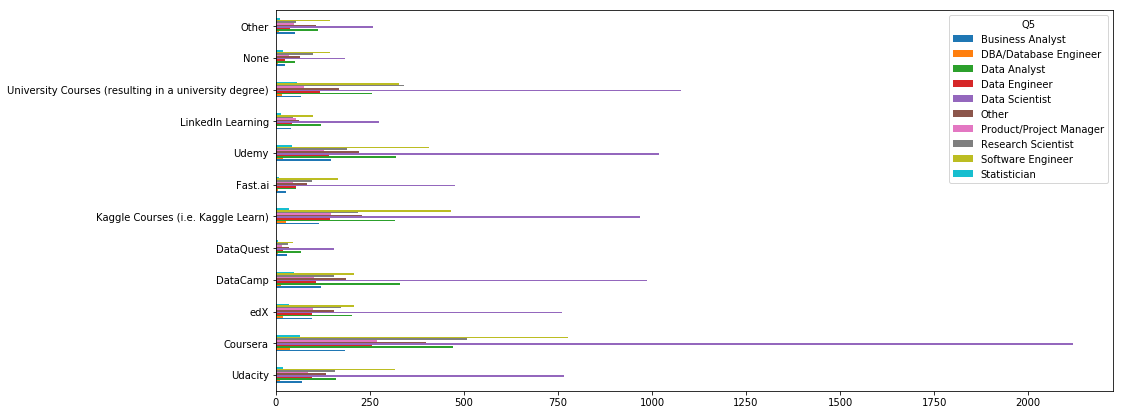

In [135]:
fig, ax = plt.subplots(figsize=(15,7))
group_platform = Q5_Q13.groupby("Q5").sum().transpose()
group_platform.plot.barh(ax= ax)

- You must attend media souces that report on data science topic. The most followed by dat scientist is Blog.

In [133]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q12", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q12 = change_value(change_name)
# Drop the last column
Q12_drop = Q12.drop(Q12.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q12 = pd.concat([only_ml_activities["Q5"], Q12_drop], axis=1)

Text(0, 0.5, 'TOTAL')

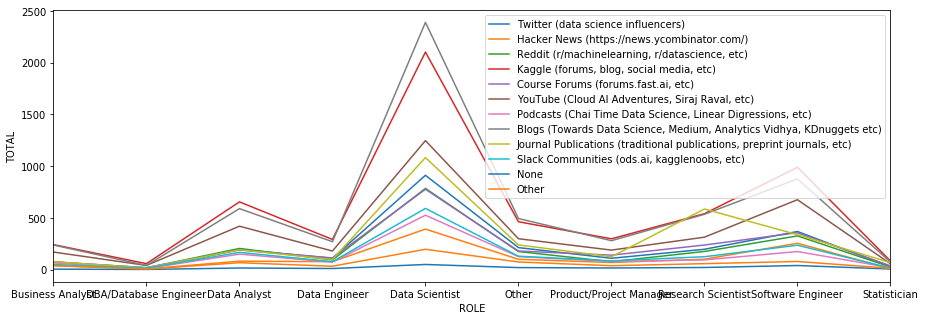

In [137]:
fig, ax = plt.subplots(figsize=(15,5))
Q5_Q12 = Q5_Q12.groupby("Q5").sum()
Q5_Q12.plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

- You must familiarize yourself with data analyze tools. The primary tool use at work or school to analyse data by data scientist is Local development environments.

Text(0, 0.5, 'TOTAL')

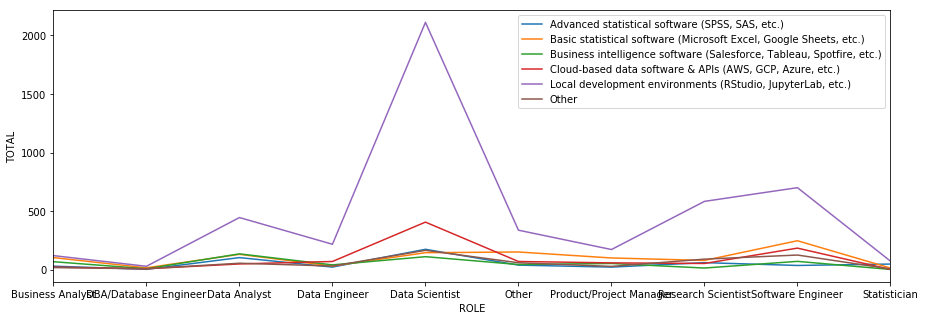

In [139]:
Q14 = pd.get_dummies(only_ml_activities["Q14"])
Q14 = Q14.reset_index(drop=True)
Q14_concat = pd.concat([only_ml_activities["Q5"], Q14], axis=1)
Q14_concat_group = Q14_concat.groupby("Q5").sum()
fig, ax = plt.subplots(figsize=(15,5))
Q14_concat_group.plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

- You must learn least a programming language for data science. The most recommended by data scientist is python.

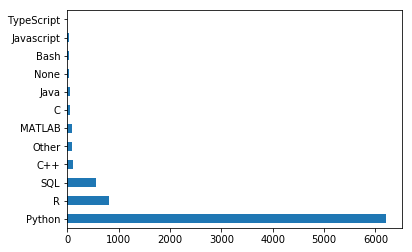

In [140]:
only_ml_activities["Q19"].value_counts().plot.barh()

- You must be ready to spent money on machine learning and cloud computing products. The graph below shows the expenditures made by the data scientist is last 5 years.

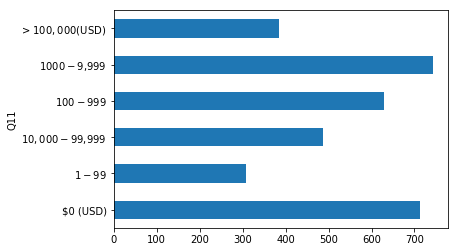

In [299]:
expense = pd.concat([only_ml_activities["Q5"], only_ml_activities["Q11"]], axis=1)
group_expense = expense.groupby(["Q5","Q11"])["Q11"].count()
group_expense["Data Scientist"].plot.barh()

- You don't need to get highest level of formal education (see 3.2)


- The gender is not a disadvantage (see 3.).

- Speaking of age, note that the youngest data scientist is between 18-21 years old and the oldest is at least 70 years old. 

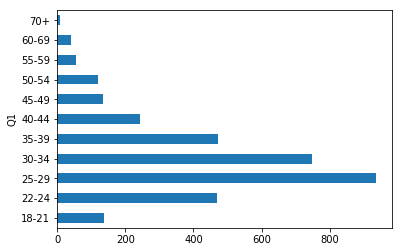

In [148]:
age = pd.concat([only_ml_activities["Q5"], only_ml_activities["Q1"]], axis=1)
group_age_interval = age.groupby(["Q5","Q1"])["Q1"].count()
group_age_interval["Data Scientist"].plot.barh()

### 4. What is Machine Learning?

Machine Learning is a data analysis method for automating analytic model development. Through algorithms that learn iteratively, Machine Learning allows computers to discover hidden insights without being programmed to know where to look for them.

At the beginning, Machine Learning was born thanks to pattern recognition technologies and the theory that computers can learn without being programmed to perform specific tasks. Researchers interested in artificial intelligence wanted to see if computers could learn from data. The iterative aspect of Machine Learning is essential because it allows models to adapt independently when exposed to new data. They learn from previous calculations to create reliable and repeatable decisions and results.

#### 4.1. Machine Learning Algorithms

Machine Learning algorithms are not new, but it is only recently that it is possible to apply complex mathematical calculations faster and faster to Big Data. Machine Learning is now used in many areas, such as autonomous vehicle development, online recommendation systems such as Netflix and Amazon, customer sentiment analysis, and fraud detection.

According to data survey 2019, Machine Learning algorithms most used whatever the role are : Linear or Logistic Regression and Decision Trees or Random Forest.

In [83]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q24", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q24 = change_value(change_name)
# Drop the last column
Q24_drop = Q24.drop(Q24.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q24 = pd.concat([only_ml_activities["Q5"], Q24_drop], axis=1)

Text(0, 0.5, 'TOTAL')

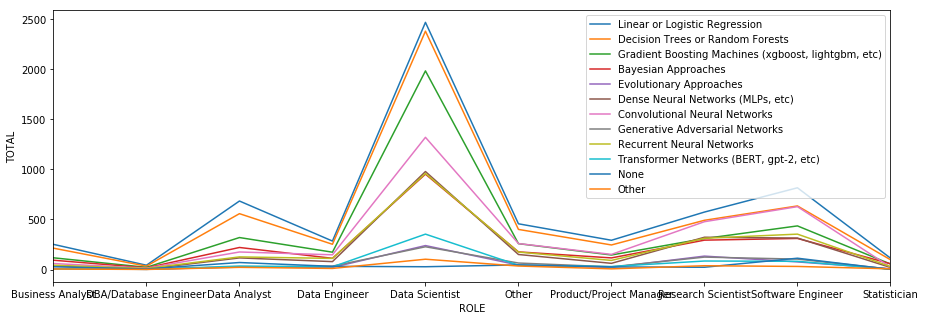

In [87]:
fig, ax = plt.subplots(figsize=(15,5))
group_Q5_Q24 = Q5_Q24.groupby("Q5").sum()
group_Q5_Q24.plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

The graph above shows us that the priorities of the algorithms vary according to the roles. This is due to everyone's activities. So the choice of an algorithm depends on the task we want to perform. This graph also shows us that the Recurrent Neural Networks and Dense Neural Networks (MLPs, etc) algorithms have almost the same number of users. These Machine Learning Algorithms can be applied using machine learning tools.

### 6. Data science and Machine Learning tools

Data scientists use many types of tools, but most commonly open source notebooks, which are web-based applications for writing and executing code, visualizing data, and displaying results, all in the same environment. Jupyter and RStudio are some of the most popular softwares.

#### 6.1. IDE's, programming language and data visualization libraries for data science and machine learning

Each step of the Data Scientist's work has associated specific tools. We found that the mostly popular IDE's is Jupiter (JupyterLab, Jupyter Notebook, etc) used by all roles followed by Rsudio (As show in following graph).

In [102]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q16", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q16 = change_value(change_name)
# Drop the last column
Q16_drop = Q16.drop(Q16.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q16 = pd.concat([only_ml_activities["Q5"], Q16_drop], axis=1)

Text(0, 0.5, 'TOTAL')

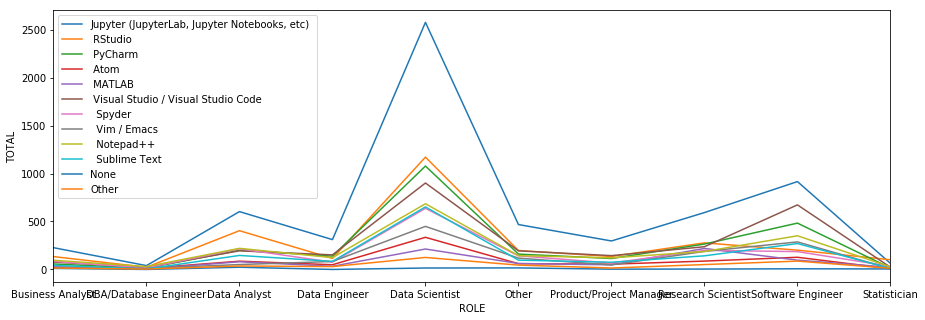

In [105]:
fig, ax = plt.subplots(figsize=(15,5))
Q5_Q16.groupby("Q5").sum().plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

Notepad software is very useful for performing analysis, but it has limitations when data scientists have to work as a team. Data science hosted notebook have been developed to solve this problem.

The graph below shows us that the hosted notebook products mainly used are :
- Kaggle Notebooks (Kernels) : 2496 users
- Google Colab : 2438 users
- Microsoft Azure Notebooks : 565 users
- Google Cloud Notebook Products (AI Platform, Datalab, etc) : 693 users
- Paperspace / Gradient : 104 users
- FloydHub : 66 users
- Binder / JupyterHub : 960 users
- IBM Watson Studio : 371 users
- Code Ocean : 48 users
We notice that there is a very big difference (number of users) between the first two and the others. Is this due to ignorance of their existence by the users? Or a question of efficiency? For the second case we can then deduce that Kaggle Notebook (Kernel) and Google Colab are the most effective for each step of the Data Scientist's work. 

In [106]:
def small_multiples_for_line_chart(df, title):
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    plt.figure(figsize=(10,15))
    # multiple line plot
    num=0
    for column in df[df.columns[1:]]:
        num+=1
        # Find the right spot on the plot
        
        plt.subplot(6,2, num)
         # plot every groups, but discreet
        for v in df[df.columns[1:]]:
            plt.plot(df.index, df[v], marker='', color='grey', linewidth=1.6, alpha=0.2)
 
        # Plot the lineplot
        plt.plot(df.index, df[column], marker='', color=palette(num), linewidth=2.4, alpha=1, label=column)

        # Same limits for everybody!
        plt.xlim(0,10)
        plt.ylim(-2,2500)

        # Not ticks everywhere
        if num in range(11) :
            plt.tick_params(labelbottom='off')
        if num not in [1,3,5,7,9,11] :
            plt.tick_params(labelleft='off')

        # Add title
        plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

    # general title
    plt.suptitle(title, fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

    # Axis title
    plt.text(0.5, 0.02, 'Time', ha='center', va='center')
    plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

In [107]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q17", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q17 = change_value(change_name)
# Drop the last column
Q17_drop = Q17.drop(Q17.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q17 = pd.concat([only_ml_activities["Q5"], Q17_drop], axis=1)

C:\Users\310\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


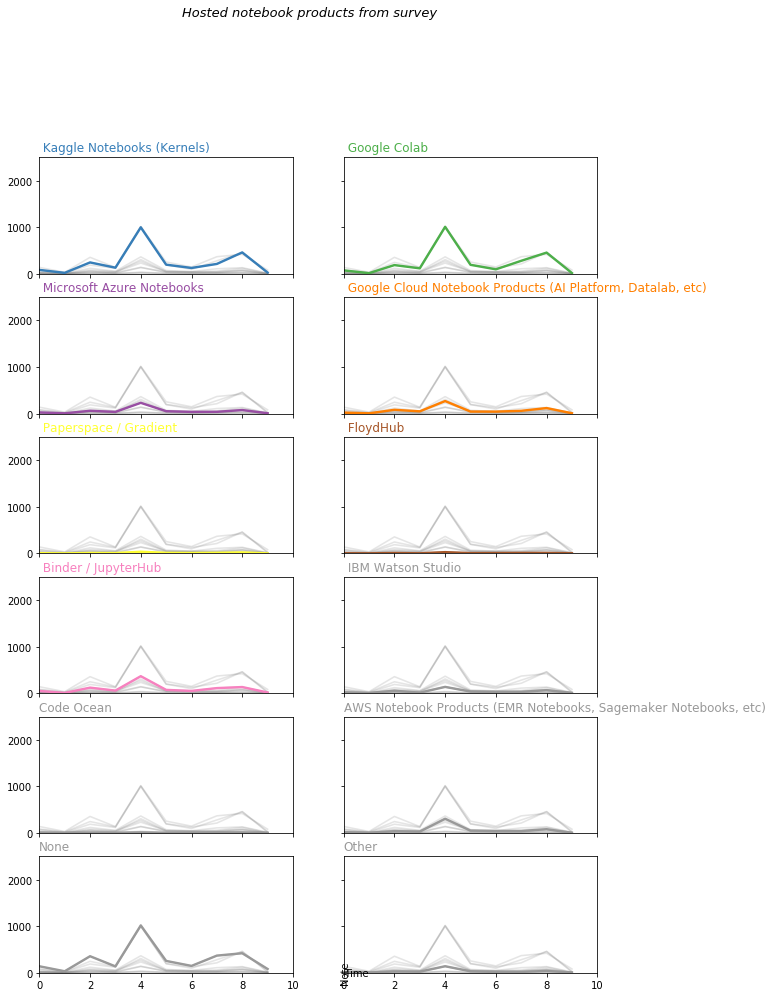

In [108]:
group_concat_Q5_Q17 = Q5_Q17.groupby("Q5").sum()
df = pd.DataFrame(group_concat_Q5_Q17.index)
#df2= group_concat_Q5_Q17[group_concat_Q5_Q17.columns]
#small_multiples_for_line_chart(df)
df2 = group_concat_Q5_Q17.reset_index(drop=True)
concat = pd.concat([df, df2], axis=1)
#concat[concat.columns[1:]]
title = "Hosted notebook products from survey"
small_multiples_for_line_chart(concat, title)

Graphic representations are more meaningful than long texts.
In data science, graphical representations are very important for seeing trends in order to make decisions. This is how several visualization libraries have been developed. The ascending order according to the most used is:
- Matplotlib
- Seaborn
- Ggplot/ggplot2
- PLotly/Plotly Express
- Shiny
- D3.js
- Bokeh
- Leaflet/Folium
- Geoplotlib

In [130]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q20", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q20 = change_value(change_name)
# Drop the last column
Q20_drop = Q20.drop(Q20.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q20 = pd.concat([only_ml_activities["Q5"], Q20_drop], axis=1)

Text(0, 0.5, 'TOTAL')

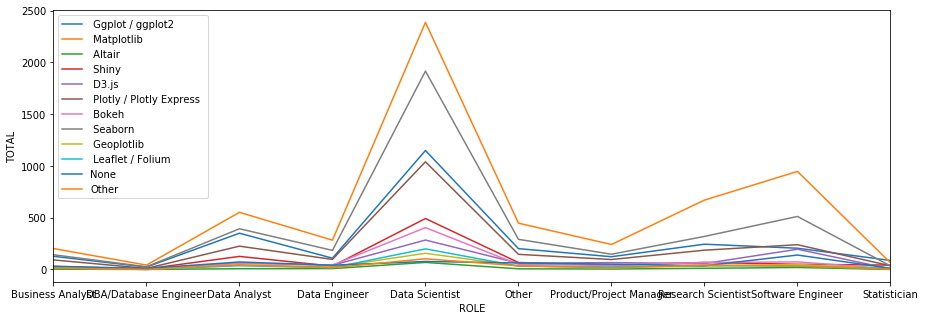

In [131]:
fig, ax = plt.subplots(figsize=(15,5))
Q5_Q20.groupby("Q5").sum().plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

In addition to IDE's, it is also very important to consider hardware resources when applying the machine learning algorithms.

#### 6.2. Hardware for data science en machine learning

Given the amount of data to be processed, the use of powerful hardware resources will solve of data science or machine learning problems quickly.

In [110]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q21", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q21 = change_value(change_name)
# Drop the last column
Q21_drop = Q21.drop(Q21.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q21 = pd.concat([only_ml_activities["Q5"], Q21_drop], axis=1)

Text(0, 0.5, 'TOTAL')

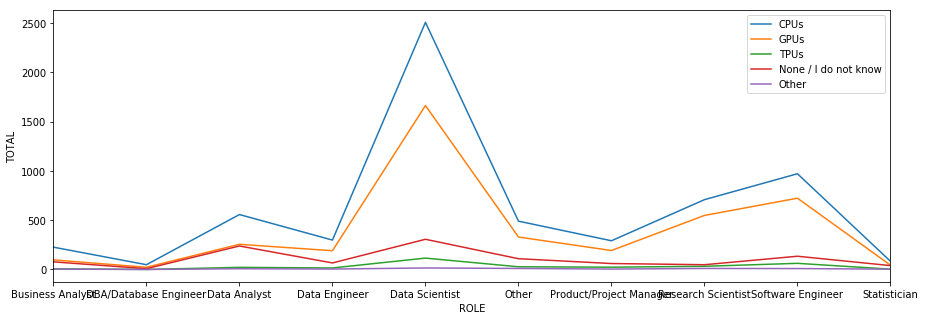

In [111]:
fig, ax = plt.subplots(figsize=(15,5))
Q5_Q21.groupby("Q5").sum().plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

Indeed, the CPU is responsible for performing all kinds of calculations. He is able to carry out many different tasks. Conversely, the GPU only manages graphical calculations. It handles the display of pixels, textures and shapes on the screen, as well as the processing of the video. And the Tensor Processing Unit (TPU) is an application-specific integrated circuit (ASIC(https://fr.m.wikipedia.org/wiki/Application-specific_integrated_circuit)) developed by Google specifically to accelerate artificial intelligence systems using neural networks. 

According to the above graph, the most using hardware resources is CPUs. On the other hand, the TPU which was designed for artificial intelligence tasks is unfortunately the least used. The maximum number of TPU usage is 5 times (see the graph below). This is very insignificant because we will need more interest in this resource given the amount of data that increases each day.

Text(0, 0.5, 'TOTAL')

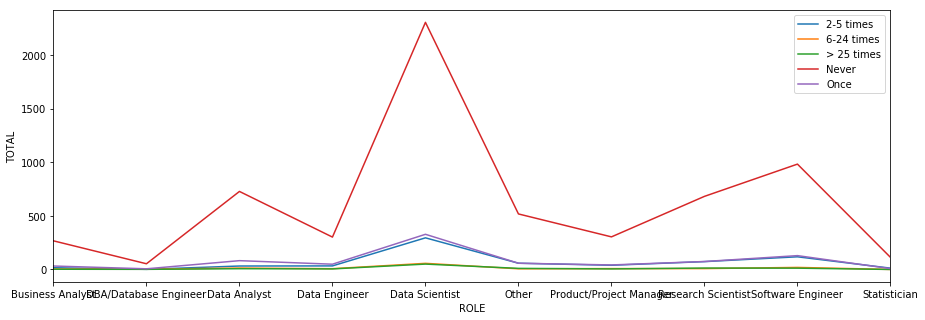

In [112]:
tpu = pd.get_dummies(only_ml_activities["Q22"])
tpu = tpu.reset_index(drop=True)
tpu_concat = pd.concat([only_ml_activities["Q5"], tpu], axis=1)
tpu_concat_group = tpu_concat.groupby("Q5").sum()
fig, ax = plt.subplots(figsize=(15,5))
tpu_concat_group.plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

#### 6.3. Machine Learning framework 

There are several machine Learning framework . Of those listed in the sample, the most popular is Scikit-learn (graph below). So it is practicable for all Machine learning tasks. 

In [93]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q28", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q28 = change_value(change_name)
# Drop the last column
Q28_drop = Q28.drop(Q28.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q28 = pd.concat([only_ml_activities["Q5"], Q28_drop], axis=1)

Text(0, 0.5, 'TOTAL')

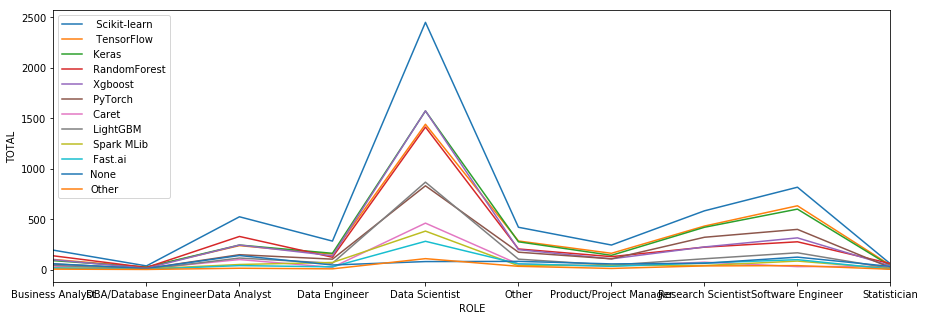

In [94]:
fig, ax = plt.subplots(figsize=(15,5))
Q5_Q28.groupby("Q5").sum().plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

We also notice that these frameworks have almost the same order of priority for all roles.

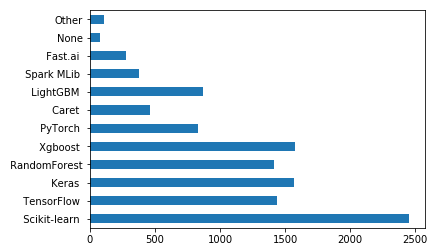

In [95]:
group_Q5 = Q5_Q28.groupby("Q5").sum().transpose()
group_Q5["Data Scientist"].plot.barh()

#### 6.4. Machine Learning tools 

In [96]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q25", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q25 = change_value(change_name)
# Drop the last column
Q25_drop = Q25.drop(Q25.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q25 = pd.concat([only_ml_activities["Q5"], Q25_drop], axis=1)

Text(0, 0.5, 'TOTAL')

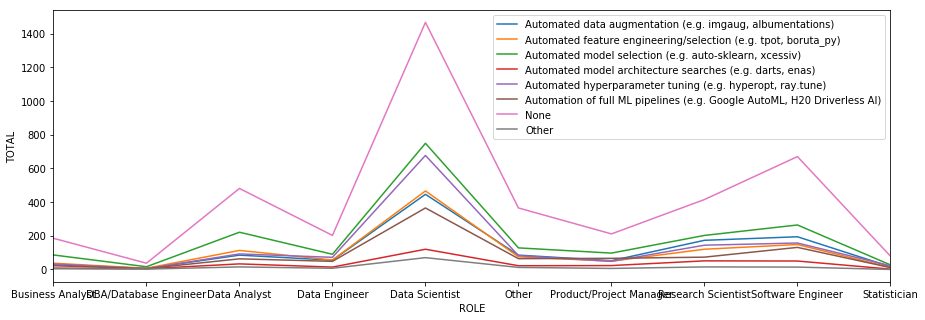

In [97]:
fig, ax = plt.subplots(figsize=(15,5))
Q5_Q25.groupby("Q5").sum().plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

The graph above shows us that the majority of respondents do not use any of these tools. We also note, as for the framework, that there are practically no priorities for using these tools according to roles. We deduce that the choice of tools does not depend on the role.

#### 6.5. Automated Machine Learning tools

According to DataRobot (https://www.datarobot.com/wiki/automated-machine-learning/), Machine Learning (AutoML) fundamentally change the way organizations Machine Learning and Data Science. The application of real-world business problems traditional methods of machine learning is a big challenge, requires a lot of time and resources. Hence the need of Automated Machine Learning tools.


Unfortunately, the graph below shows us that MLs are almost not used. This may be due to ignorance of the existence of these tools.

In [100]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q33", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q33 = change_value(change_name)
# Drop the last column
Q33_drop = Q33.drop(Q33.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q33 = pd.concat([only_ml_activities["Q5"], Q33_drop], axis=1)

Text(0, 0.5, 'TOTAL')

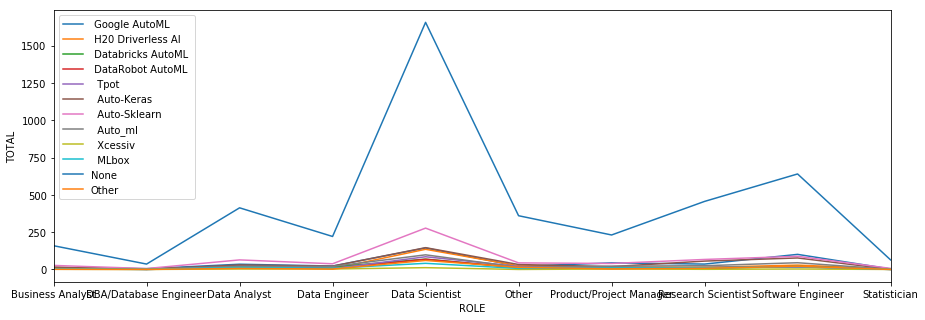

In [101]:
fig, ax = plt.subplots(figsize=(15,5))
Q5_Q33.groupby("Q5").sum().plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

#### 6.6. Machine Learning products

Machine Learning products gives developers and scientists data the means to create, train and deploy Machine Learning models faster.

In [113]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q32", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q32 = change_value(change_name)
# Drop the last column
Q32_drop = Q32.drop(Q32.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q32 = pd.concat([only_ml_activities["Q5"], Q32_drop], axis=1)

Text(0, 0.5, 'TOTAL')

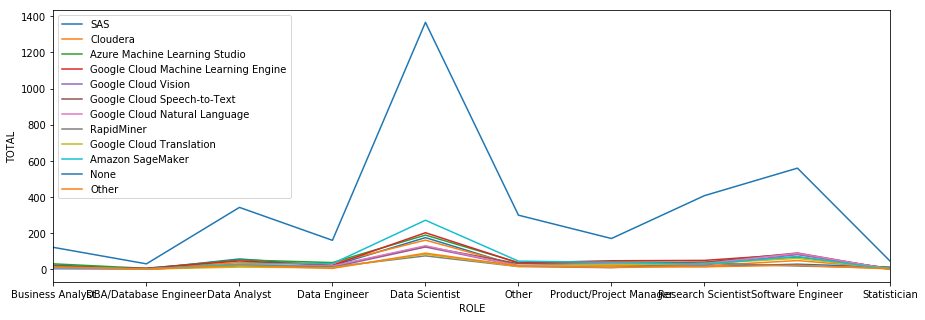

In [114]:
fig, ax = plt.subplots(figsize=(15,5))
Q5_Q32.groupby("Q5").sum().plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

In [117]:
user = 0
for col in Q5_Q32.columns[1:]:
    s = Q5_Q32[col].sum()
    if((col !="None") & (col != "Other")):
        user = user + s
    print(col + " : " + str(s) + "\n")
print("Total users" + " : " + str(user))

SAS : 377

Cloudera : 368

Azure Machine Learning Studio : 512

Google Cloud Machine Learning Engine : 511

Google Cloud Vision : 324

Google Cloud Speech-to-Text : 382

Google Cloud Natural Language : 356

RapidMiner : 220

Google Cloud Translation : 260

Amazon SageMaker : 533

None : 3506

Other : 203

Total users : 3843


We note that the Machine Learning products are practically not used. However these product are based on cloud computing.

### 7. Cloud Computing platforms

Cloud computing is to use remote computer servers via a network, usually the Internet, to store or exploit data.The main services offered in cloud computing are SaaS (Software as a Service), PaaS (Platform as a Service) and IaaS (Infrastructure as a Service). Depending on the service, operating systems, infrastructure software and application software will be the responsibility of either the supplier or the customer.

In [118]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q29", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q29 = change_value(change_name)
# Drop the last column
Q29_drop = Q29.drop(Q29.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q29 = pd.concat([only_ml_activities["Q5"], Q29_drop], axis=1)

Text(0, 0.5, 'TOTAL')

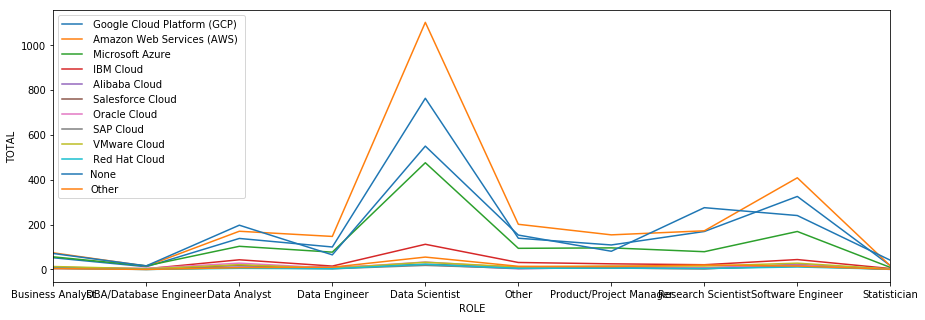

In [119]:
fig, ax = plt.subplots(figsize=(15,5))
Q5_Q29.groupby("Q5").sum().plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

The most Cloud Computing platforms used is Amazon Web Service Especially by data scientist. On the other hand, the majority of the answerers do not use cloud computing products and big data/analytics products (view below graphs).

In [120]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q30", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q30 = change_value(change_name)
# Drop the last column
Q30_drop = Q30.drop(Q30.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q30 = pd.concat([only_ml_activities["Q5"], Q30_drop], axis=1)

Text(0, 0.5, 'TOTAL')

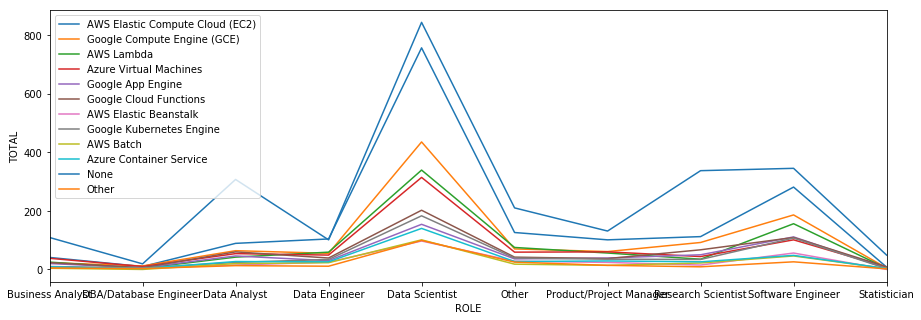

In [121]:
fig, ax = plt.subplots(figsize=(15,5))
Q5_Q30.groupby("Q5").sum().plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

In [122]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q31", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q31 = change_value(change_name)
# Drop the last column
Q31_drop = Q31.drop(Q31.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_Q31 = pd.concat([only_ml_activities["Q5"], Q31_drop], axis=1)

Text(0, 0.5, 'TOTAL')

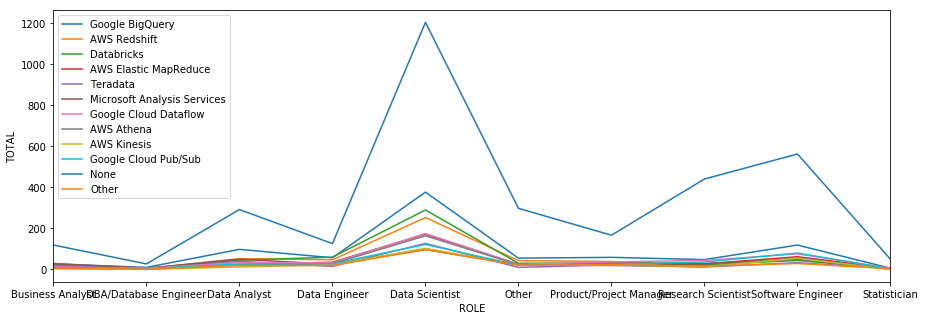

In [125]:
fig, ax = plt.subplots(figsize=(15,5))
Q5_Q31.groupby("Q5").sum().plot(ax=ax)
ax.set_xlabel("ROLE")
ax.set_ylabel("TOTAL")

### More information

The graph below show us that the main hosted notebook product used for "Build prototypes to explore applying machine learning to new areas" tasks is Google Colab. And Kaggle Notebook(kernels) for other tasks.

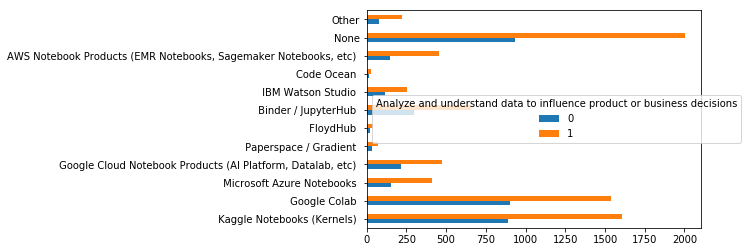

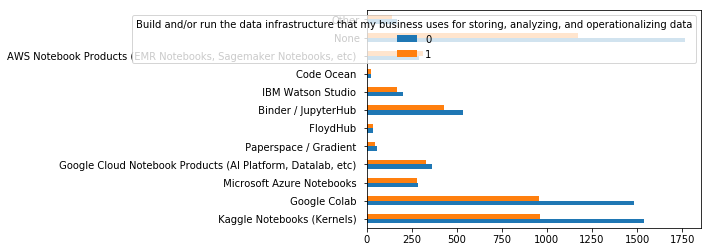

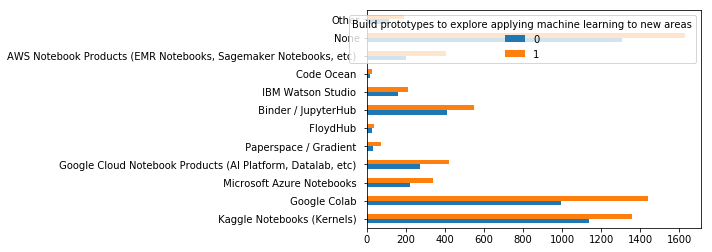

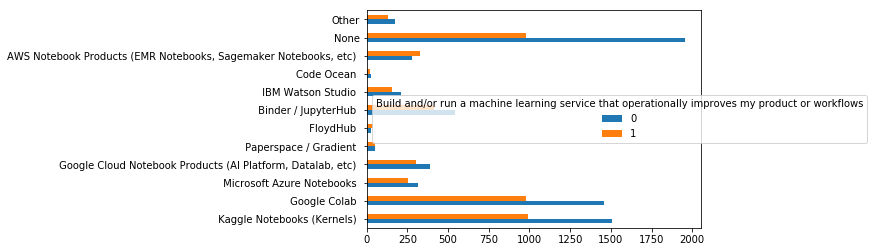

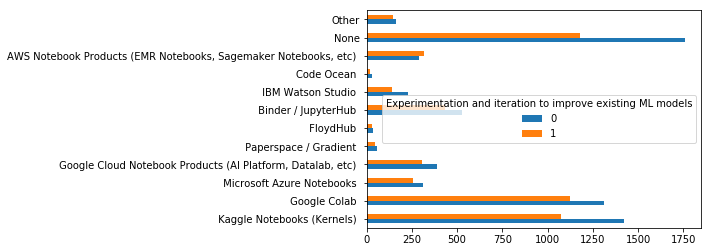

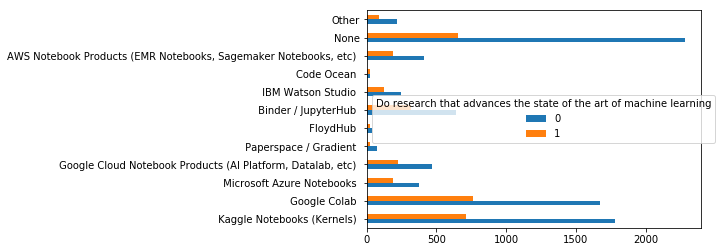

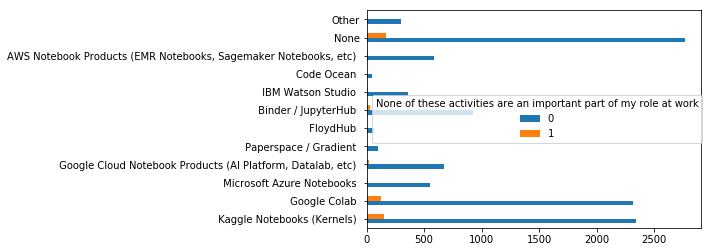

In [292]:
for x in range(len(Q9_drop.columns)-1):
    column = pd.DataFrame(Q9_drop[Q9_drop.columns[x]])
    df=pd.concat([column, Q17_drop], axis=1)
    df.groupby(Q9_drop.columns[x]).sum().transpose().plot.barh()

In [302]:
# Get activity columns from DataFrame only_ml_activitiabses
columns = question_column("Q27", only_ml_activities)
# Change columns name
change_name = change_column_name(columns)
# Change cell value 0 or 1
Q27 = change_value(change_name)
# Drop the last column
Q27_drop = Q27.drop(Q27.columns[-1], axis=1)
# Concatenate activity columns with respondent role columns
Q5_27 = pd.concat([only_ml_activities["Q5"], Q27_drop], axis=1)

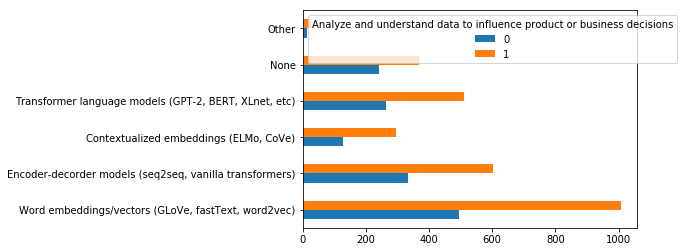

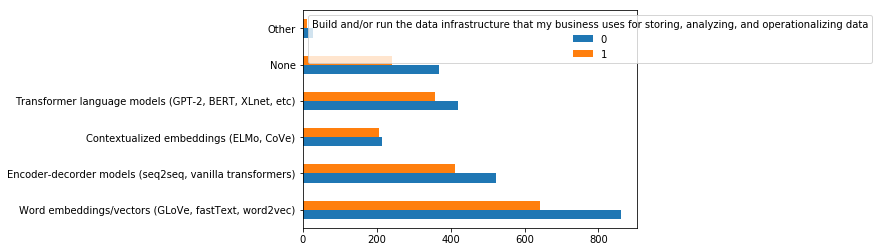

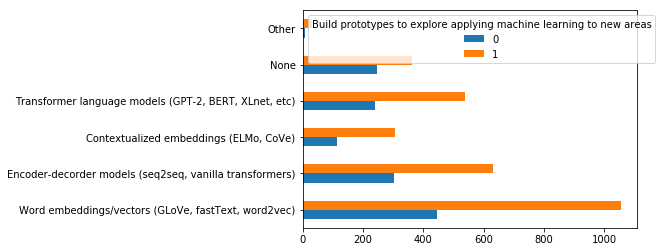

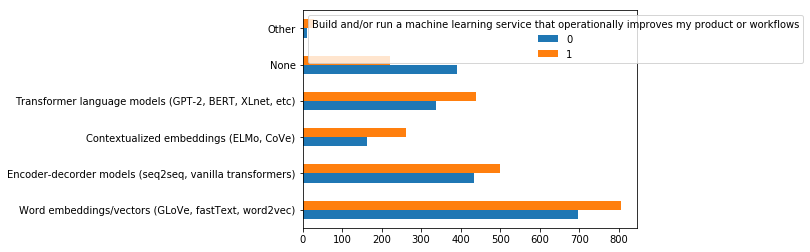

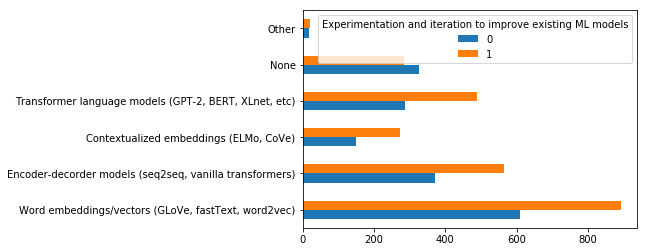

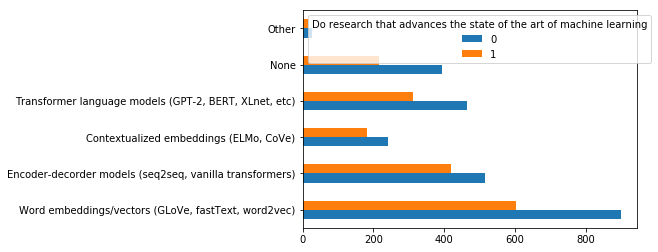

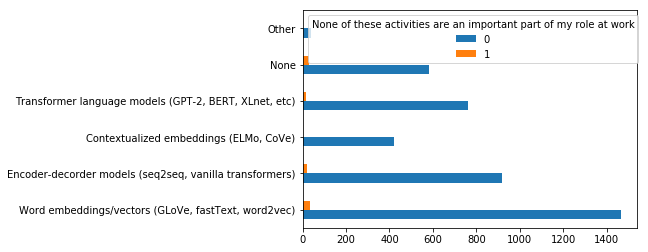

In [303]:
for x in range(len(Q9_drop.columns)-1):
    column = pd.DataFrame(Q9_drop[Q9_drop.columns[x]])
    df=pd.concat([column, Q27_drop], axis=1)
    df.groupby(Q9_drop.columns[x]).sum().transpose().plot.barh()

### 8. Conclusion

We conclude by saying that there is not really a big difference between scientist data and other roles. Because they perform the same tasks, use the same tools. However tools like Automated Machine Learning Tools, Machine Learning products are not used enough. Data science communities should further educate others about the benefits of these tools.